In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('results.csv')
display(df)

,depth,fls,annotation,sample,iou,time,param
0,1.0,4.0,1.0,50.0,0.929560,2161.415431,1677.0
1,1.0,4.0,1.0,30.0,0.909426,3030.670150,1677.0
2,1.0,4.0,1.0,10.0,0.879774,3342.842634,1677.0
3,1.0,8.0,1.0,80.0,0.904185,210.467779,6489.0
4,1.0,8.0,1.0,50.0,0.912898,2274.643114,6489.0
...,...,...,...,...,...,...,...
70,4.0,16.0,1.0,10.0,0.876226,3265.427004,1942289.0
71,4.0,32.0,1.0,80.0,0.931071,166.223544,7762465.0
72,4.0,32.0,1.0,50.0,0.948004,2401.524875,7762465.0
73,4.0,32.0,1.0,30.0,0.945837,2316.289551,7762465.0


In [22]:
df.loc[(df["depth"] == 1.0) & (df["fls"] == 4.0) & (df["sample"] == 50.0) ].to_numpy()[0][4]
param_list = np.unique(df['param'].to_numpy())

In [25]:
iou_param = [df.loc[(df["sample"] == 50.0) & (df["param"] == p)].to_numpy()[0][4] for p in param_list]
print(iou_param)

[0.9295604682775616, 0.9128983350378354, 0.908924024937898, 0.9199698995823894, 0.9087061313767602, 0.9291933161854896, 0.9137233961971056, 0.942009523019752, 0.9528354731466464, 0.9255480972881543, 0.923935300496482, 0.9441044154632396, 0.9488318019641788, 0.9385017530123096, 0.9398962762319646, 0.934059516980704, 0.9278698153283242, 0.9385422486774414, 0.9480039052980408]


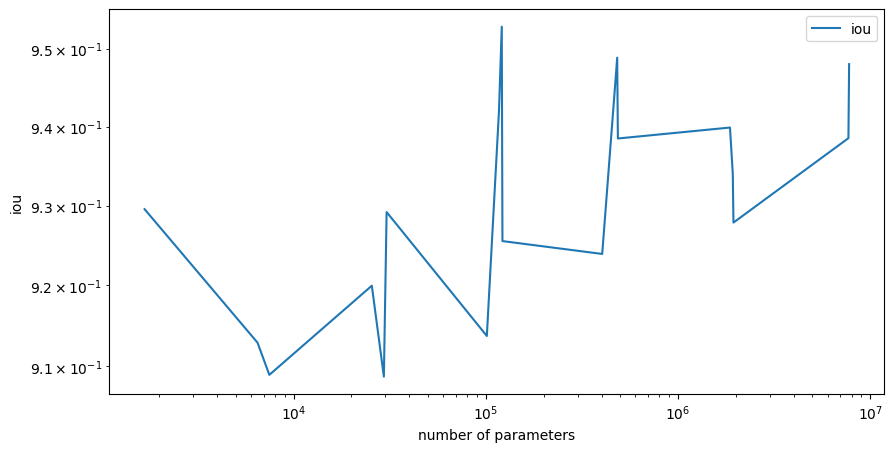

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(param_list, iou_param, label="iou")
plt.xlabel("number of parameters")
plt.ylabel("iou")
plt.xscale('log')
plt.legend()
plt.show()

In [4]:
import seaborn as sns
df_80 = df.loc[df['sample'] == 80]
df_50 = df.loc[df['sample'] == 50]
d = df_80.pivot(index="depth", columns="fls", values="iou")
d_5 = df_50.pivot(index="depth", columns="fls", values="iou")

<Axes: xlabel='fls', ylabel='depth'>

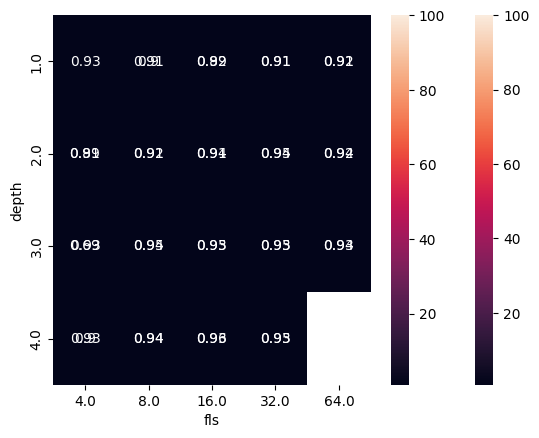

In [ ]:
from matplotlib.colors import LogNorm
sns.heatmap(d, annot=True, vmax=100, cbar = False)
sns.heatmap(d_5, annot=True, vmax=100, cbar = False)

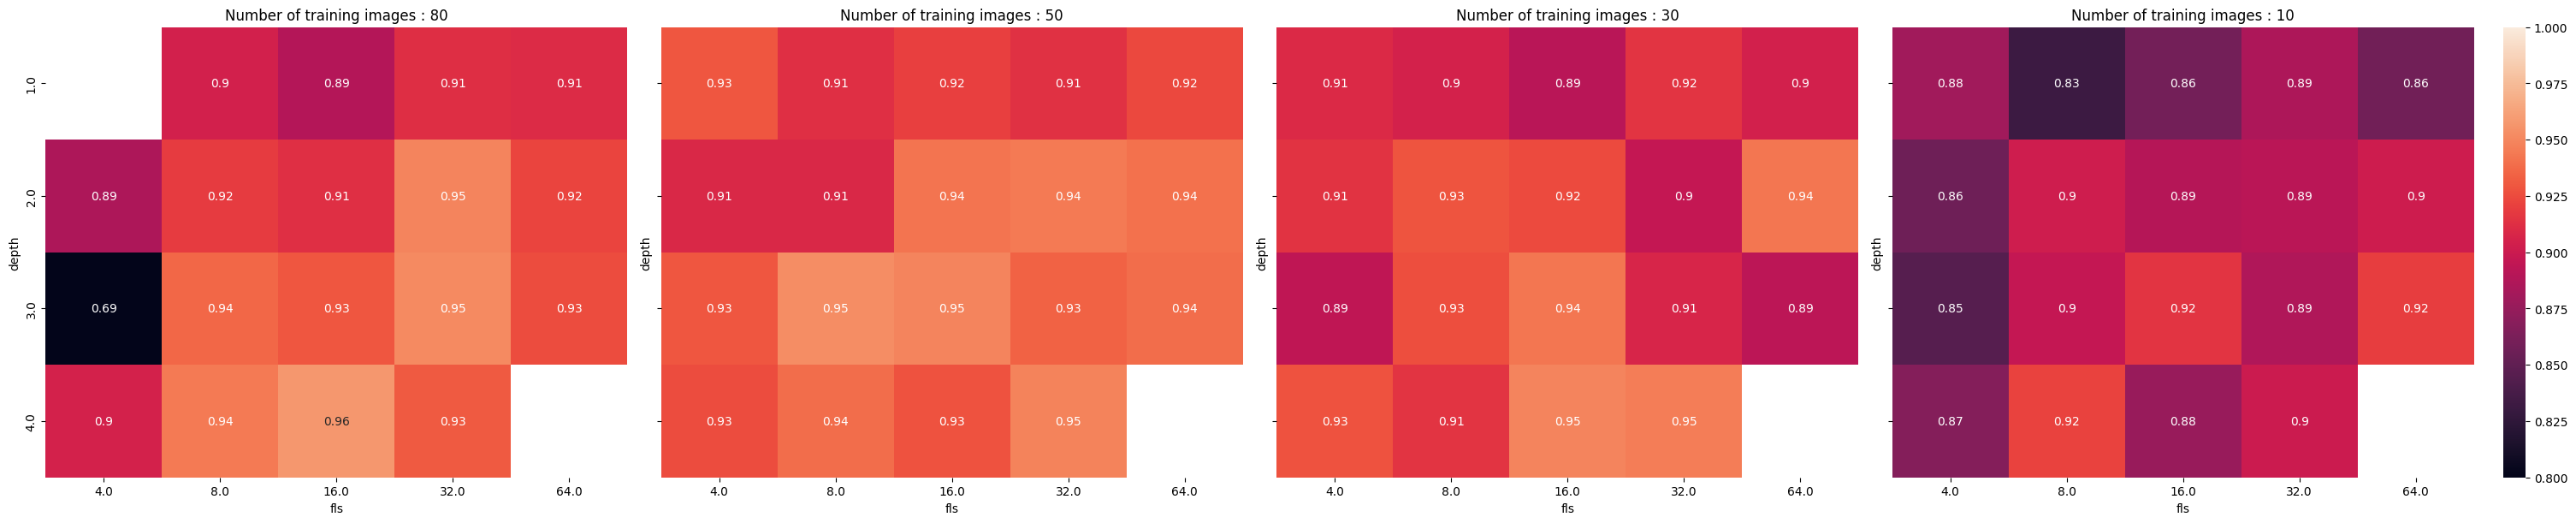

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(30, 6), constrained_layout=True, sharex=True, sharey=True)
ax = ax.ravel()
idx_ax = 0
for samples in [80,50,30,10]:
    df_sample = df.loc[df['sample'] == samples]
    d = df_sample.pivot(index="depth", columns="fls", values="iou")
    if samples == 10:
        sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.8, vmax=1.0)
    else : 
        sns.heatmap(d, annot=True,ax=ax[idx_ax],vmin=0.8, vmax=1.0, cbar = False)
    
    ax[idx_ax].title.set_text(f"Number of training images : {samples}")
    idx_ax +=1
fig.savefig("plots/heatmap_depth_fls_1scale.png")
